# Exercises lecture 3 - 16/10/2023

## Exercise 3.1
Create a one-dimensional histogram filled with 5 values and save the histogram image to a png file

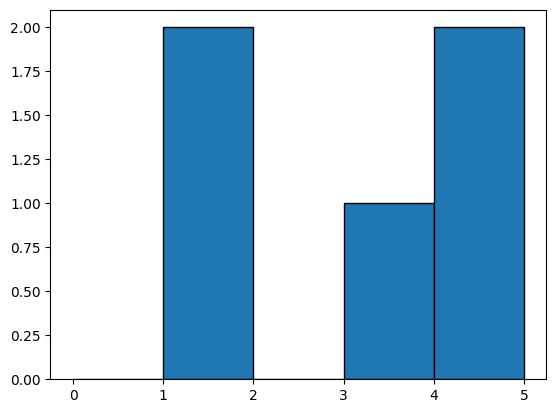

In [7]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.arange(0,6)
elements = np.random.randint(0,5,5)
plt.hist(elements, bins = bins, edgecolor='black')
plt.show()

## Exercise 3.2
Read the text file eventi_unif.txt:
Print the first 10 positive elements to the screen.

Count the number of events contained in the file.

Determine the minimum and maximum values among the numbers saved in the file.


In [8]:
with open('data/eventi_unif.txt','r') as datas:
  positive_counter = 0
  for d in datas:
    if (f := float(d)) > 0:
      positive_counter+=1
      print(f,end=' ')
    if positive_counter == 10:
      break


1.74343 0.881333 2.94428 2.73867 3.56551 0.547841 3.55342 6.35506 2.54804 4.95112 

In [9]:
with open('data/eventi_unif.txt','r') as datas:
  print(len(datas.readlines()))

10000


In [10]:
with open('data/eventi_unif.txt','r') as datas:
  data1 = np.array([np.float64(x) for x in datas.readlines()])
  print('max: ',max(data1),' min: ',min(data1))

max:  6.99967  min:  -3.99968


## Exercise 3.3
Read the text file eventi_gauss.txt:

Fill a histogram with the first N numbers contained in the file, where N is a command-line parameter during program execution.

Choose the histogram’s definition range and its bin number based on the numbers to be represented

In [11]:
def sturges (N) :
     return int( np.ceil( 1 + 3.322 * np.log(N) ) )

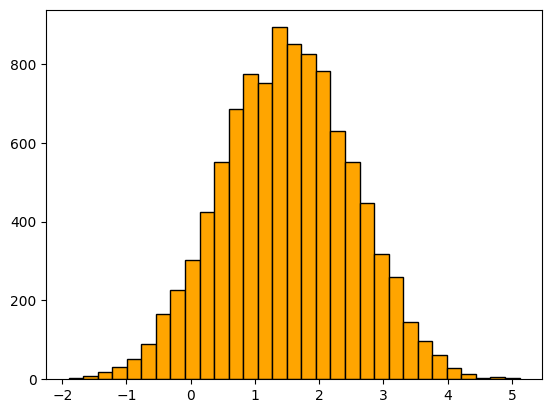

In [12]:
N = -1
with open('data/eventi_gauss.txt','r') as datas:
  data2 = np.array([np.float64(i) for i in datas.readlines()[0:N]])

bins = np.linspace(min(data2),max(data2),sturges(len(data2)))
plt.hist(data2,color='orange', bins = bins, edgecolor='black')
plt.show()


## Exercise 3.4
Display the distributions of events from the two files of the previous exercises, overlaid, finding the best visualization for the comparison between the two histograms.

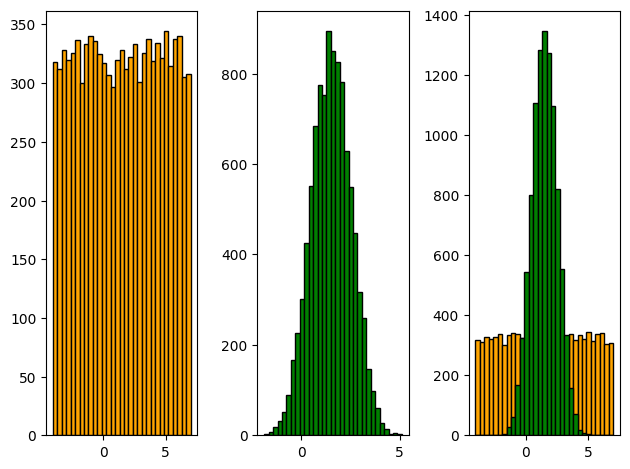

In [24]:
bins2 = np.linspace(min(data2),max(data2),sturges(len(data2)))
bins1 = np.linspace(min(data1),max(data1),sturges(len(data1)))

fig, ax = plt.subplots (nrows = 1, ncols = 3)
ax[0].hist (data1,color = 'orange',edgecolor='black', bins = bins1)
ax[1].hist (data2,color = 'green',edgecolor='black', bins = bins2)
ax[2].hist (data1,color = 'orange',edgecolor='black', bins = bins1)
ax[2].hist (data2,color = 'green',edgecolor='black', bins = bins1)

fig.tight_layout()
plt.show()

## Exercise 3.5
Read the text file eventi_unif.txt:

Calculate the mean of the numbers in the text file.

Calculate the variance of the numbers in the text file.

Calculate the standard deviation of the numbers in the text file.

Calculate the standard deviation from the mean of the numbers in the text file.


In [14]:
eventi_unif = np.loadtxt('data/eventi_unif.txt', dtype=np.float64)

mean = np.average(eventi_unif)
std = np.std(eventi_unif)
variance = std**2
std_mean = std / np.sqrt(len(eventi_unif))

print(mean,std,variance,std_mean)

1.5082904156312 3.1776809689426666 10.097656340380404 0.031776809689426665


## Exercise 3.6
Write a python library which, given the name of a text file containing a sample of events as input, is able to read the sample and save it in a numpy array, then calculate its mean, variance, standard deviation, standard deviation from the mean, display the sample in a histogram with an appropriately chosen definition range and bin number. Write a test program for the created library.

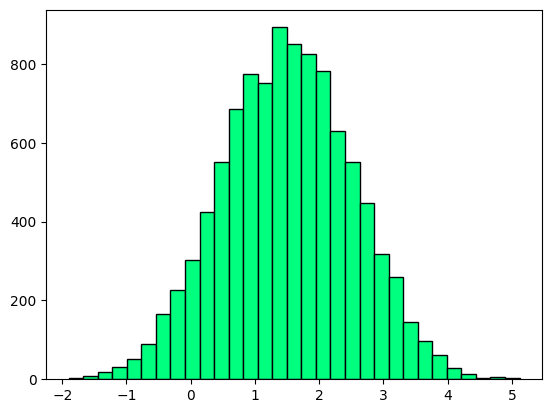

{'mean': 1.5031271979973, 'std': 1.0130372425889678, 'var': 1.0262444548722591, 'std_mean': 0.015031271979973}


In [15]:
## MY LIBRARY

import matplotlib.pyplot as plt
import numpy as np
from mylib.basics import data_reader_plotter

_ = data_reader_plotter('data/eventi_gauss.txt')


## Exercise 3.7
Write a Python program to draw a Gaussian distribution and its cumulative function

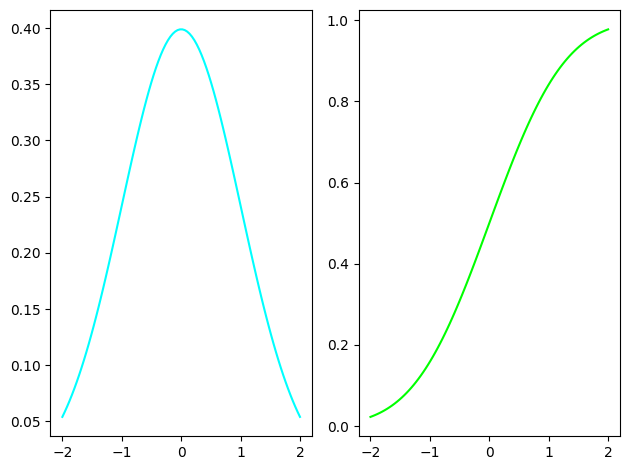

In [25]:
from scipy.stats import norm

x = np.linspace(-2,2,100)
norm_fix = norm (0, 1)

fig, ax = plt.subplots (nrows = 1, ncols = 2)
ax[0].plot(x,norm_fix.pdf(x), color ='aqua')
ax[1].plot(x,norm_fix.cdf(x), color='lime')

fig.tight_layout()
plt.show()

## Exercise 3.8
Write a Python program to draw an exponential distribution and its cumulative function

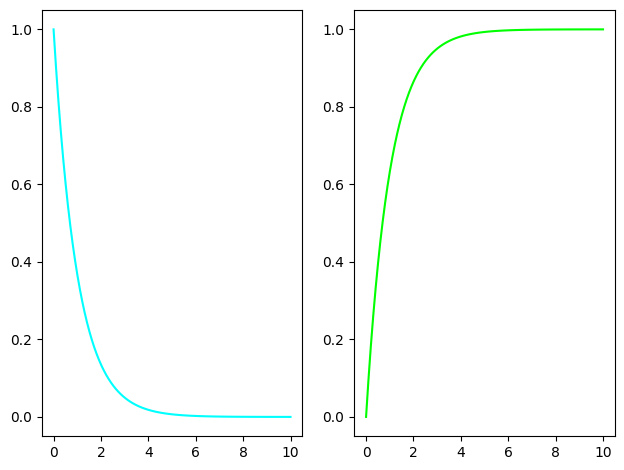

In [26]:
from scipy.stats import expon

x = np.linspace(0,10,100)
expon_fix = expon (0, 1)

fig, ax = plt.subplots (nrows = 1, ncols = 2)
ax[0].plot(x,expon_fix.pdf(x), color ='aqua')
ax[1].plot(x,expon_fix.cdf(x), color='lime')
fig.tight_layout()
plt.show()

## Exercise 3.9
Use the Python scipy.stat.norm object to determine the area of a normal distribution of its tails outside the range included within an interval of 1, 2, 3, 4, and 5 standard deviations around its mean

In [18]:
from scipy.integrate import quad

def prob_tails(t):
  return np.round(1-quad(norm.pdf,-1*t,1*t)[0],9)

for t in range(1,6):
  norm_fix = norm(0,1*t)
  print(f"The area of the tails at {t} sigma is: {prob_tails(t)}")

The area of the tails at 1 sigma is: 0.317310508
The area of the tails at 2 sigma is: 0.045500264
The area of the tails at 3 sigma is: 0.002699796
The area of the tails at 4 sigma is: 6.3342e-05
The area of the tails at 5 sigma is: 5.73e-07


## Exercise 3.10
Write a Python program to draw a binomial distribution and its cumulative function

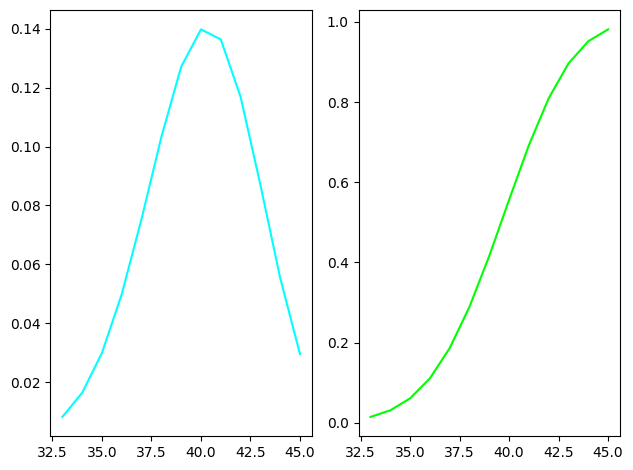

In [27]:
from scipy.stats import binom
N,p = 50,0.8

binom_fix = binom(N,p)
x = np.arange(binom_fix.ppf(0.01),binom_fix.ppf(0.99))

fig, ax = plt.subplots (nrows = 1, ncols = 2)
ax[0].plot(x,binom_fix.pmf(x), color ='aqua')
ax[1].plot(x,binom_fix.cdf(x), color='lime')
fig.tight_layout()
plt.show()

## Exercise 3.11
Write a Python program to draw a Poisson distribution for several values of its mean, overlapped

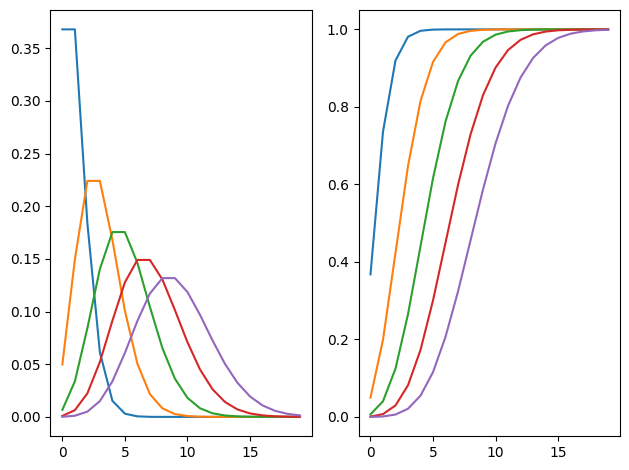

In [28]:
from scipy.stats import poisson
from matplotlib import pyplot as plt

fig, ax = plt.subplots (nrows = 1, ncols = 2)

for mu in range(1,10,2): # 5 cicli
  k = np.arange(0,20)
  poisson_fix = poisson(mu)

  ax[0].plot(k,poisson_fix.pmf(k))
  ax[1].plot(k,poisson_fix.cdf(k))
  # ax[0].plot([mu,mu], [0,poisson_fix.pmf(mu)], color = 'red')
fig.tight_layout()
plt.show()

## Exercise 3.12
Write a Python program to draw a Poisson distribution. Show, by using the third and fourth central momenta calculations available in the scipy.stat library, that the momenta of a Poisson distribution asymptotically tend to the ones of a Gaussian.

In [21]:
ns,nk = norm.stats(moments='sk')
print("Normal momenta: ")
print(f"\tSkewness: {ns}\n\tKurtosis: {nk}\n")
print("Poisson momenta: ")
print("mu:\tSkewness:\tKurtosis:")
for mu in range(100,1001,100):
  ps,pk = poisson.stats(mu, moments='sk')
  print(f"{mu}\t{ps:.3f}\t\t{pk:.3f}")

Normal momenta: 
	Skewness: 0.0
	Kurtosis: 0.0

Poisson momenta: 
mu:	Skewness:	Kurtosis:
100	0.100		0.010
200	0.071		0.005
300	0.058		0.003
400	0.050		0.003
500	0.045		0.002
600	0.041		0.002
700	0.038		0.001
800	0.035		0.001
900	0.033		0.001
1000	0.032		0.001


## Exercise 3.13
What is the probability that ten measurements of the same quantity expected to be Gaussian fall within an interval of 1 standard deviation width around the mean?

In [22]:
p1s = 1 - prob_tails(1) # probability in 1 sigma for 1 value taken from ex 3.9 (around 0.68)
n = 10
k = 10

print('Probability of getting 10 measurements in 1 sigma: ',binom.pmf(k,n,p1s))
print(p1s**k)

Probability of getting 10 measurements in 1 sigma:  0.02199035204922011
0.02199035204922011


## Exercise 3.14
What is the probability that ten measurements of the same counting experiment expected to be Poisson distributed are all larger than the expected average number of events?

In [23]:
mu = 4
poisson_fix = poisson(mu)

vals = [poisson_fix.pmf(i) for i in range(mu,mu*5)]
p = sum(vals) # integral over non continous function

n = 10
k = 10

print(f'Probability of getting 10 measurements over {mu}: ',binom.pmf(k,n,p))
print(p**k)

Probability of getting 10 measurements over 4:  0.0034058704396392027
0.0034058704396392027
